## 06: Webscraping
### Section 9.4-12.3

#### HTML

In [1]:
# check if the URL was accessed correctly, 200=success, 404=failure
import requests as req
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-2calculator/consumer-price-index-1913-"
res=req.get(url)
print(res.status_code) # incorrect link
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-"
res=req.get(url)
print(res.status_code) # correct

404
200


In [2]:
# extract the text, write to file
text=res.text
with open("pagesource.html","w") as fout:
    fout.write(text)

In [3]:
# handlers
from html.parser import HTMLParser

# Define a custom parser class that inherits from HTMLParser
class MyHTMLParser(HTMLParser):
    
    # Called automatically whenever a start tag (e.g., <p>) is encountered
    def handle_starttag(self, tag, attrs):
        # Format and print the name of the start tag
        st = "start tag = {:8s}".format(tag)
        print(st)
    
    # Called automatically whenever an end tag (e.g., </p>) is encountered
    def handle_endtag(self, tag):
        # Format and print the name of the end tag
        st = "end tag = {:8s}".format(tag)
        print(st)
    
    # Called automatically whenever text data (content between tags) is found
    def handle_data(self, data):
        # Print the text content found between tags
        print("data found = " + data)


# Read the HTML content from a file
with open("sample.html") as fin:
    text = fin.read()     # Read the entire file into a single string


# Create a parser object from our custom class
parser = MyHTMLParser()

# Feed the HTML text to the parser
parser.feed(text)

start tag = html    
data found = 

start tag = head    
data found = 

start tag = title   
data found =  THIS IS A TITLE 
end tag = title   
data found = 

end tag = head    
data found = 

start tag = body    
data found = 

start tag = p       
data found = 
This is a sentence in a paragraph.
Here is another.

end tag = p       
data found = 

start tag = p       
data found = 
This is what happens when I put a br tag 
start tag = br      
end tag = br      
data found = 
in some text.
Here is a table.

end tag = p       
data found = 

start tag = table   
data found = 

start tag = th      
data found =  
start tag = td      
data found =  heading1 
end tag = td      
data found =  
start tag = td      
data found =  heading2 
end tag = td      
data found =  
start tag = td      
data found =  heading3 
end tag = td      
data found =  
end tag = th      
data found = 

start tag = tr      
data found =  
start tag = td      
data found =  row1column1 
end tag = td      
data fo

In [4]:
# to get line and column number
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    
    # what to do if start tag encountered
    def handle_starttag(self, tag, attrs):
        pos=self.getpos()
        line=pos[0]
        col=pos[1]
        st="start tag = {:10s} at line {:5d} column {:5d}".format(tag,line,col)
        print(st)
    # what to do if end tag encountered
    def handle_endtag(self, tag):
        pos=self.getpos()
        line=pos[0]
        col=pos[1]
        st="end tag   = {:10s} at line {:5d} column {:5d}".format(tag,line,col)
        print(st)
    # how to handle data
    def handle_data(self, data):
        pass

with open("sample.html") as fin:
    text=fin.read()
    #print(text)
    #print("\n\n")
# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)

start tag = html       at line     1 column     0
start tag = head       at line     2 column     0
start tag = title      at line     3 column     0
end tag   = title      at line     3 column    24
end tag   = head       at line     4 column     0
start tag = body       at line     5 column     0
start tag = p          at line     6 column     0
end tag   = p          at line     9 column     0
start tag = p          at line    10 column     0
start tag = br         at line    11 column    41
end tag   = br         at line    11 column    41
end tag   = p          at line    14 column     0
start tag = table      at line    15 column     0
start tag = th         at line    16 column     0
start tag = td         at line    16 column     5
end tag   = td         at line    16 column    19
start tag = td         at line    16 column    25
end tag   = td         at line    16 column    39
start tag = td         at line    16 column    45
end tag   = td         at line    16 column    59


In [5]:
# run default constructor but with custom attributes
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__() # super() = HTMLParser class
        self.inside_title_tag=False
    def handle_starttag(self, tag, attrs):
        if tag=="title":
            self.inside_title_tag=True
    def handle_endtag(self, tag):
        if tag=="title":
            self.inside_title_tag=False
    def handle_data(self, data):
        if self.inside_title_tag:
            print(data)
with open("sample.html") as fin:
    text=fin.read()

# instantiate a parser
parser = MyHTMLParser()

# use feed method
parser.feed(text)

 THIS IS A TITLE 


In [6]:
# back to fed data example, getting the data and writing to disk
import requests as req
# url="https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/#:~:text=Consumer%20Price%20Index%20Data%20from%201913%20to"
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-"
res=req.get(url)
with open("fed.txt","w") as fout:
    fout.write(res.text)

In [7]:
# see how many tables there are
  
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__()
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            print("opening table tag found")
    def handle_endtag(self, tag):
        if tag=="table":
            print("ending table tag found")
    def handle_data(self, data):
        pass

with open("fed.txt") as fin:
    text=fin.read()
parser = MyHTMLParser()

# use feed method
parser.feed(text)

opening table tag found
ending table tag found


In [8]:
# getting all data
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.intable=False
        self.inrow=False
        self.incell=False
        self.L=[]
        self.Lrow=[]
    def handle_starttag(self, tag, attrs):
        if tag=="table":
            self.intable=True
        elif tag=="tr":
            self.inrow=True
        elif tag=="td":
            self.incell=True
          
    def handle_endtag(self, tag):
        if tag=="table":
            #print("ending table tag found")
            self.intable=False
        elif tag=="tr":
            self.inrow=False
            self.L.append(self.Lrow.copy())
            self.Lrow=[]
        elif tag=="td":
            self.incell=False
            
    def handle_data(self, data):
        if self.intable:
            if self.inrow:
                if self.incell:
                    self.Lrow.append(data)

with open("fed.txt") as fin:
    text=fin.read()
parser = MyHTMLParser()

# use feed method
parser.feed(text)

parser.L

[[],
 ['\n            ',
  '1913',
  '\n            ',
  '\n            ',
  '9.9',
  '\n            ',
  '\n            ',
  '\xa0',
  '\n            '],
 ['\n            ',
  '1914',
  '\n            ',
  '\n            ',
  '10.0',
  '\n            ',
  '\n            ',
  '1.3%',
  '\n            '],
 ['\n            ',
  '1915',
  '\n            ',
  '\n            ',
  '10.1',
  '\n            ',
  '\n            ',
  '0.9%',
  '\n            '],
 ['\n            ',
  '1916',
  '\n            ',
  '\n            ',
  '10.9',
  '\n            ',
  '\n            ',
  '7.7%',
  '\n            '],
 ['\n            ',
  '1917',
  '\n            ',
  '\n            ',
  '12.8',
  '\n            ',
  '\n            ',
  '17.8%',
  '\n            '],
 ['\n            ',
  '1918',
  '\n            ',
  '\n            ',
  '15.0',
  '\n            ',
  '\n            ',
  '17.3%',
  '\n            '],
 ['\n            ',
  '1919',
  '\n            ',
  '\n            ',
  '17.3',
  '\n   

In [9]:
# Data Processing
L=parser.L  #cleaning the list
L

[[],
 ['\n            ',
  '1913',
  '\n            ',
  '\n            ',
  '9.9',
  '\n            ',
  '\n            ',
  '\xa0',
  '\n            '],
 ['\n            ',
  '1914',
  '\n            ',
  '\n            ',
  '10.0',
  '\n            ',
  '\n            ',
  '1.3%',
  '\n            '],
 ['\n            ',
  '1915',
  '\n            ',
  '\n            ',
  '10.1',
  '\n            ',
  '\n            ',
  '0.9%',
  '\n            '],
 ['\n            ',
  '1916',
  '\n            ',
  '\n            ',
  '10.9',
  '\n            ',
  '\n            ',
  '7.7%',
  '\n            '],
 ['\n            ',
  '1917',
  '\n            ',
  '\n            ',
  '12.8',
  '\n            ',
  '\n            ',
  '17.8%',
  '\n            '],
 ['\n            ',
  '1918',
  '\n            ',
  '\n            ',
  '15.0',
  '\n            ',
  '\n            ',
  '17.3%',
  '\n            '],
 ['\n            ',
  '1919',
  '\n            ',
  '\n            ',
  '17.3',
  '\n   

In [10]:
L=[[x.replace("\xa0","") for x in y] for y in L] # get rid of xa0 characters
L=[[x.replace("\n","") for x in y] for y in L] # removing new line characters
L=[[x.replace(" ","") for x in y] for y in L] # removing empty spaces
L

[[],
 ['', '1913', '', '', '9.9', '', '', '', ''],
 ['', '1914', '', '', '10.0', '', '', '1.3%', ''],
 ['', '1915', '', '', '10.1', '', '', '0.9%', ''],
 ['', '1916', '', '', '10.9', '', '', '7.7%', ''],
 ['', '1917', '', '', '12.8', '', '', '17.8%', ''],
 ['', '1918', '', '', '15.0', '', '', '17.3%', ''],
 ['', '1919', '', '', '17.3', '', '', '15.2%', ''],
 ['', '1920', '', '', '20.0', '', '', '15.6%', ''],
 ['', '1921', '', '', '17.9', '', '', '-10.9%', ''],
 ['', '1922', '', '', '16.8', '', '', '-6.2%', ''],
 ['', '1923', '', '', '17.1', '', '', '1.8%', ''],
 ['', '1924', '', '', '17.1', '', '', '0.4%', ''],
 ['', '1925', '', '', '17.5', '', '', '2.4%', ''],
 ['', '1926', '', '', '17.7', '', '', '0.9%', ''],
 ['', '1927', '', '', '17.4', '', '', '-1.9%', ''],
 ['', '1928', '', '', '17.2', '', '', '-1.2%', ''],
 ['', '1929', '', '', '17.2', '', '', '0.0%', ''],
 ['', '1930', '', '', '16.7', '', '', '-2.7%', ''],
 ['', '1931', '', '', '15.2', '', '', '-8.9%', ''],
 ['', '1932', '', ''

In [11]:
print([len(x) for x in L]) #get length of rows
L=[x for x in L if len(x)>0]

[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [12]:
L=[[x[1],x[4],x[7]] for x in L] # Get cols we want
L=L[1:] # remove first row
L

[['1914', '10.0', '1.3%'],
 ['1915', '10.1', '0.9%'],
 ['1916', '10.9', '7.7%'],
 ['1917', '12.8', '17.8%'],
 ['1918', '15.0', '17.3%'],
 ['1919', '17.3', '15.2%'],
 ['1920', '20.0', '15.6%'],
 ['1921', '17.9', '-10.9%'],
 ['1922', '16.8', '-6.2%'],
 ['1923', '17.1', '1.8%'],
 ['1924', '17.1', '0.4%'],
 ['1925', '17.5', '2.4%'],
 ['1926', '17.7', '0.9%'],
 ['1927', '17.4', '-1.9%'],
 ['1928', '17.2', '-1.2%'],
 ['1929', '17.2', '0.0%'],
 ['1930', '16.7', '-2.7%'],
 ['1931', '15.2', '-8.9%'],
 ['1932', '13.6', '-10.3%'],
 ['1933', '12.9', '-5.2%'],
 ['1934', '13.4', '3.5%'],
 ['1935', '13.7', '2.6%'],
 ['1936', '13.9', '1.0%'],
 ['1937', '14.4', '3.7%'],
 ['1938', '14.1', '-2.0%'],
 ['1939', '13.9', '-1.3%'],
 ['1940', '14.0', '0.7%'],
 ['1941', '14.7', '5.1%'],
 ['1942', '16.3', '10.9%'],
 ['1943', '17.3', '6.0%'],
 ['1944', '17.6', '1.6%'],
 ['1945', '18.0', '2.3%'],
 ['1946', '19.5', '8.5%'],
 ['1947', '22.3', '14.4%'],
 ['1948', '24.0', '7.7%'],
 ['1949', '23.8', '-1.0%'],
 ['1950',

In [13]:
L=[(x[0],x[1],x[2].replace("%","")) for x in L] # get rid of the percentage sign
L=[(int(x[0]),float(x[1]),float(x[2])) for x in L] # convert string to number
L

[(1914, 10.0, 1.3),
 (1915, 10.1, 0.9),
 (1916, 10.9, 7.7),
 (1917, 12.8, 17.8),
 (1918, 15.0, 17.3),
 (1919, 17.3, 15.2),
 (1920, 20.0, 15.6),
 (1921, 17.9, -10.9),
 (1922, 16.8, -6.2),
 (1923, 17.1, 1.8),
 (1924, 17.1, 0.4),
 (1925, 17.5, 2.4),
 (1926, 17.7, 0.9),
 (1927, 17.4, -1.9),
 (1928, 17.2, -1.2),
 (1929, 17.2, 0.0),
 (1930, 16.7, -2.7),
 (1931, 15.2, -8.9),
 (1932, 13.6, -10.3),
 (1933, 12.9, -5.2),
 (1934, 13.4, 3.5),
 (1935, 13.7, 2.6),
 (1936, 13.9, 1.0),
 (1937, 14.4, 3.7),
 (1938, 14.1, -2.0),
 (1939, 13.9, -1.3),
 (1940, 14.0, 0.7),
 (1941, 14.7, 5.1),
 (1942, 16.3, 10.9),
 (1943, 17.3, 6.0),
 (1944, 17.6, 1.6),
 (1945, 18.0, 2.3),
 (1946, 19.5, 8.5),
 (1947, 22.3, 14.4),
 (1948, 24.0, 7.7),
 (1949, 23.8, -1.0),
 (1950, 24.1, 1.1),
 (1951, 26.0, 7.9),
 (1952, 26.6, 2.3),
 (1953, 26.8, 0.8),
 (1954, 26.9, 0.3),
 (1955, 26.8, -0.3),
 (1956, 27.2, 1.5),
 (1957, 28.1, 3.3),
 (1958, 28.9, 2.7),
 (1959, 29.2, 1.08),
 (1960, 29.6, 1.5),
 (1961, 29.9, 1.1),
 (1962, 30.3, 1.2),

In [14]:
# naming variables
year=[x[0] for x in L]
inf=[x[2] for x in L]

Text(0, 0.5, 'Inflation rate')

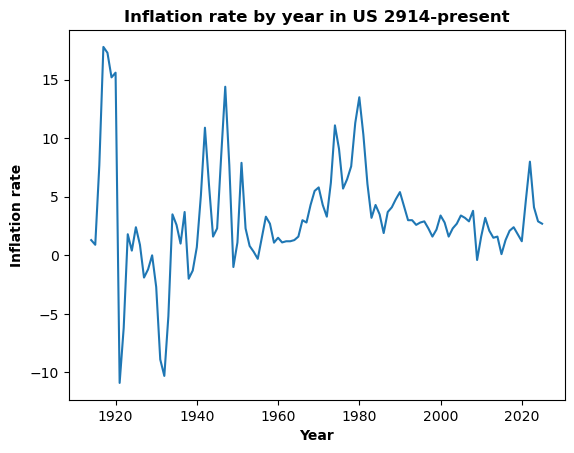

In [15]:
import matplotlib.pyplot as plt
plt.plot(year,inf)
plt.title("Inflation rate by year in US 2914-present",fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Inflation rate', fontweight='bold')

#### JSON

In [16]:
# 'J'ava 'S'cript 'O'bject 'N'otation
# convert dictionary to json string, useful to store to a file
import json

mydictionary={'a':(175,56), 'b': 165, 'c':[4,5,6], 'd':{'dan':45, 'john':"johnstring"}}

s=json.dumps(mydictionary)

print(s)
print(type(s))

{"a": [175, 56], "b": 165, "c": [4, 5, 6], "d": {"dan": 45, "john": "johnstring"}}
<class 'str'>


In [17]:
# doing the reverse, not slash and quotes are special characters
import json
s="[1, 2, {\"a\": \"apple\", \"d\": \"dog\", \"c\": [\"cat\", 12, [2, 3]]}]"
print(s)
print(type(s))

[1, 2, {"a": "apple", "d": "dog", "c": ["cat", 12, [2, 3]]}]
<class 'str'>


#### REST APIs, HTTP Requests

In [18]:
# REST API is a website that enables GET requests
import requests
# GET YOUR OWN API KEY!
url="https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=pfe&apikey=BVTKTSNPKMSDK0TN"
resp = requests.get(url)
print(type(data)) #output is a json string
print(resp.text) 

NameError: name 'data' is not defined

In [19]:
import json
import requests
url="https://www.alphavantage.co/query?function=FX_WEEKLY&from_symbol=EUR&to_symbol=USD&apikey=BVTKTSNPKMSDK0TN"
resp = requests.get(url)
data=json.loads(resp.text)
print(type(data))

# Check if json is valid
#try:
#    json.loads("abc:5")
#except:
#    print("not valid JSON")

# check 404 or 200
resp.status_code
    
L=list(data.keys())
print(L)
data[L[0]]

<class 'dict'>
['Meta Data', 'Time Series FX (Weekly)']


{'1. Information': 'Forex Weekly Prices (open, high, low, close)',
 '2. From Symbol': 'EUR',
 '3. To Symbol': 'USD',
 '4. Last Refreshed': '2025-11-19',
 '5. Time Zone': 'UTC'}

In [20]:
# make an array of date strings and closing rates
import datetime
date=[]
close=[]
for k in data[L[1]]:
    date.append(datetime.datetime.strptime(k, '%Y-%m-%d').date())
    close.append(float(data[L[1]][k]['4. close']))

print(date[1:10])
print(close[1:10])

[datetime.date(2025, 11, 14), datetime.date(2025, 11, 7), datetime.date(2025, 10, 31), datetime.date(2025, 10, 24), datetime.date(2025, 10, 17), datetime.date(2025, 10, 10), datetime.date(2025, 10, 3), datetime.date(2025, 9, 26), datetime.date(2025, 9, 19)]
[1.162, 1.1565, 1.1534, 1.1625, 1.1651, 1.1618, 1.1741, 1.1701, 1.1744]


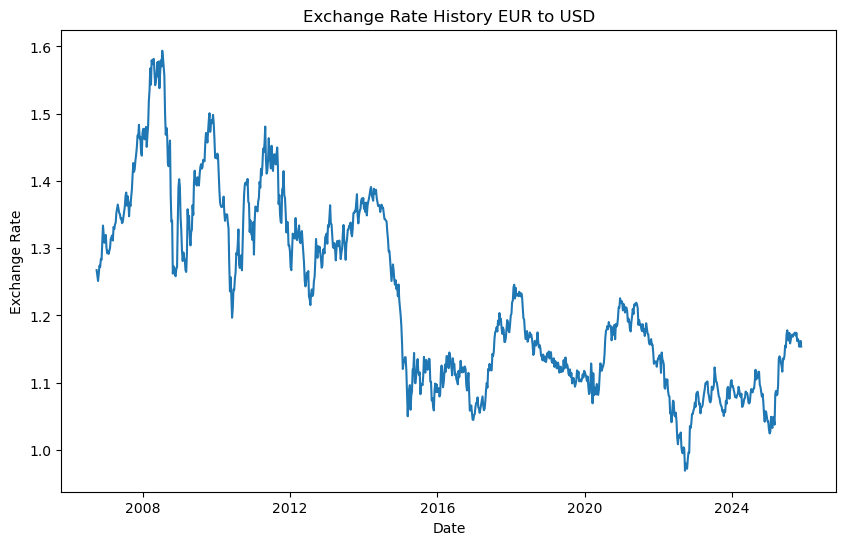

In [21]:
# plot the data
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Exchange Rate History EUR to USD")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.plot(date,close)

In [22]:
# Alternate: POST requests for more information
import requests

# The URL for making a POST request on httpbin
url = 'https://httpbin.org/post'

# Example data to send with the POST request
data = {'T': {"a":1, "b": [3,4,5], 'v':5.6},"L":[8,9,3]}
data_json=json.dumps(data)

# Sending the POST request
response = requests.post(url, data=data_json)

# Printing the response text (JSON)
print(response.text)

{
  "args": {}, 
  "data": "{\"T\": {\"a\": 1, \"b\": [3, 4, 5], \"v\": 5.6}, \"L\": [8, 9, 3]}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br, zstd", 
    "Content-Length": "57", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.5", 
    "X-Amzn-Trace-Id": "Root=1-691f44af-245edc0d0a292cdc3af9d17f"
  }, 
  "json": {
    "L": [
      8, 
      9, 
      3
    ], 
    "T": {
      "a": 1, 
      "b": [
        3, 
        4, 
        5
      ], 
      "v": 5.6
    }
  }, 
  "origin": "128.220.159.212", 
  "url": "https://httpbin.org/post"
}



#### RegEx

In [23]:
# RegEx is used to see if a particular pattern can be found somewhere in a string, return location
import re

text="My name is John. What is yours?"
pattern="John" # regular expression - no special characters
m=re.search(pattern,text)

if m:
    print("found a match")
    print('Type: ',type(m))
    print('Span: ', m.span())
    print('from: ', m.start())
    print('To: ', m.end())
    print(text[m.start():m.end()])
else:
    print("no match")

found a match
Type:  <class 're.Match'>
Span:  (11, 15)
from:  11
To:  15
John


In [ ]:
text="My name is Joan. What is yours?"
pattern="John" 
m=re.search(pattern,text)

if m:
    print("found a match")
    print('Type: ',type(m))
    print('Span: ', m.span())
    print('from: ', m.start())
    print('To: ', m.end())
    print(text[m.start():m.end()])
else:
    print("no match")

no match


In [ ]:
# Now turning it into a search function
import re
def Search(pattern,text):
    m=re.search(pattern,text)
    if m:
        print("found a match")
        print(m.span())
        print(text[m.start():m.end()])
    else:
        print("no match")

Search("John","My name is John. What is yours?")
print('\n')
Search("345","01234567890123456789") # works with numbers
print('\n')
Search(r"\t","What is your name?\n\tMy name is John.") # and whitespaces

found a match
(11, 15)
John


found a match
(3, 6)
345


found a match
(19, 20)
	


In [ ]:
# (.) means any ONE character except \n or \t
Search("d.g","what the dig is happening") #span returns [n-1, n]

# if we want the period to be interpreted as a character, we use DOTALL (including new line)
re.search("d.g","d\ng",re.DOTALL)

found a match
(9, 12)
dig


<re.Match object; span=(0, 3), match='d\ng'>

In [ ]:
# use carrot ^ to see if the portion that matches is a substring
# matches start at beginning or end and proceed
Search("^d.g","dog")
Search("^d.g","dog barked")
Search("^d.g","d\ng")

found a match
(0, 3)
dog
found a match
(0, 3)
dog
no match


In [ ]:
# Dollar sign refers to search from the end of the string
Search("Jo.n$","are you there John\n I don't see youJohn\n")

found a match
(35, 39)
John


In [ ]:
# * for zero or more copies, as many as possible
Search("o*","This is a test") # will find a match hence zero or more
Search("o*","ooooooooooooooooooooooo")

found a match
(0, 0)

found a match
(0, 23)
ooooooooooooooooooooooo


In [ ]:
# RegEx is greedy: if it finds a matching pattern at some position, it finds the first appearance, then takes all around
Search("Go*","G things happen to Goood people") # Looks for G, and zero or more "o"
Search("(ab)*","ababbabab") # group with () to search an expression

found a match
(0, 1)
G
found a match
(0, 4)
abab


In [ ]:
# + means match one or more repitition (as much as possible)
Search("pup+","here puppy")

found a match
(5, 9)
pupp


In [ ]:
# ? used for exactly 0 or 1
Search("(xo)?","xoxo")

found a match
(0, 2)
xo


In [ ]:
# to ensure nongreediness, use +?: (one or more)+ (0 or 1)=one exactly (as few as possible)
Search("(co)+?","Can you come to my cove?")

found a match
(8, 10)
co


In [ ]:
# *? is non greedy * (zero or more, as few as possible)
Search("A.*g","Hey, you dummy ... All people have some goodness, but it is hard to see goodness in some.")
Search("A.*?g","Hey, you dummy ... All people have some goodness, but it is hard to see goodness in some.")

found a match
(19, 73)
All people have some goodness, but it is hard to see g
found a match
(19, 41)
All people have some g


In [ ]:
# single question mark used for optional RE
Search("any (dogs)?.*","I didn't see any dogs or cats, did you?")
Search("any (dogs)?.*cats","I didn't see any or cats, did you?")

found a match
(13, 39)
any dogs or cats, did you?
found a match
(13, 24)
any or cats


In [ ]:
# ??: dont include the expression unless neede to get a match
Search("ab?","ab") # when searching, precedence is given to the optional argument (it would rather include the option)
Search("ab??","ab") # forces the option to not be included > option included

found a match
(0, 2)
ab
found a match
(0, 1)
a


In [ ]:
# braces match the expression M times, note +? is the same as {1}
Search("(xo){4}","xo i really love you xoxoxoxo")

found a match
(21, 29)
xoxoxoxo


In [ ]:
#{m,} for at least
Search("(xo){2,}","xo i really love you xoxo")

found a match
(21, 25)
xoxo


In [ ]:
#{,n} for at most
Search("(xo){,3}","xo i really love you xoxoxox")

found a match
(0, 2)
xo


In [ ]:
# string seacrh via ^(anything in the string)file extension$
Search("^(file.*).pdf$","file_record_transcript.pdf")
Search(r"^(file.*\.pdf)$","file_07241999.pdf")
Search(r"^(file.*\.pdf)$","testfile_fake.pdf.tmp")

found a match
(0, 26)
file_record_transcript.pdf
found a match
(0, 17)
file_07241999.pdf
no match


In [ ]:
# can double capture using two parenthesis
pattern = r"([a-zA-Z]{3}\s([0-9]{4}))" # searches three letters, a space, then 4 digits
m=re.match(pattern, "Jan 1987")
m.groups()

('Jan 1987', '1987')

In [ ]:
pattern = r"(\d+)x(\d+)"
m1=re.match(pattern,"1280x720")
m1.groups()

('1280', '720')

In [ ]:
import re
def Search(pattern,text,flags=0):
    m=re.search(pattern,text,flags)
    if m:
        print("found a match")
        print(m.span())
        print(text[m.start():m.end()])
    else:
        print("no match")

# Reworked search function to include dotALL
# “Find ‘dog’, then any amount of stuff, then ‘cat’ later on.”
Search("dog.*cat","I lost my dog.\n He was chasing your cat")
print("\n")
Search("dog.*cat","I lost my dog.\n He was chasing your cat",re.DOTALL)

no match


found a match
(10, 39)
dog.
 He was chasing your cat


In [ ]:
# Searching for special characters requires a r (rawstring) and backslash
pattern=r"\+"
text="2+5=7"
Search(pattern,text)

found a match
(1, 2)
+


In [ ]:
# Square brackets are used for a set of characters
# Find any two of abcde
Search("[abcde]{2}","can you help me find my lost cat please")

found a match
(0, 2)
ca


In [ ]:
# using a carrot (circumflex) at the beginning means NOT
Search("[^abc]{2}","abc2d")
# any character in brackets is to be taken literally

found a match
(3, 5)
2d
no match


In [ ]:
# \d = [0-9] (any digit)
# \D = [^0-9] (any non-digit)
Search(r"\d","abcd3dcba")
Search(r"\D","9876e5432")

found a match
(4, 5)
3
found a match
(4, 5)
e


In [ ]:
# \w is the same as [a-zA-Z0-9_] #all lower letters, upper letters, numbers
pattern=r"\w"
string="M"
Search(pattern,string)

# \W is the same as [^a-zA-Z0-9_]
pattern=r"\W([A-Z]\d){3}" #find whitespace, then any quantity of 3 x (letter and number)
string="My license plate 000abc is E3Y4F7."
Search(pattern,string)

found a match
(0, 1)
M
found a match
(26, 33)
 E3Y4F7


In [ ]:
# similarity whitespace is \s and \S
import re
pattern=r"\s\d{3}-\d{3}-\d{4}" # whitespace, 3 digits - 3 digits - 4 digits
string="Is your phone number 877-236-1876?"
re.search(pattern,string)
print("\n")

 #We can use it to search for dates
Search(r"\s\d{2}[_/\-]?\d{2}[_/\-]?\d{4}","I was born on 04/12/1955") # whitespace, 2 digits, any seperator (including none) of quantity 1,...
Search(r"\s\d{2}[_/\-]?\d{2}[_/\-]?\d{4}","I was born on 04-12-1955")
Search(r"\s\d{2}[_/\-]?\d{2}[_/\-]?\d{4}","I was born on 04121955")



found a match
(13, 24)
 04/12/1955
found a match
(13, 24)
 04-12-1955
found a match
(13, 22)
 04121955


In [ ]:
# logical OR (when using A|B, if A matches then B doesn't check even if it matches more)
pattern="(dog)|(cat)"
string="I don't like dogs, I do like cats"
Search(pattern,string)

found a match
(13, 16)
dog


In [ ]:
# Flags (.I, .L, etc) and the | in python for binary OR operator
# Flags are integers, and 0 means no flag
def Search(pattern,text,flags=0):
    m=re.search(pattern,text,flags)
    if m:
        print("found a match")
        print(m.span())
        print(m.group())
    else:
        print("no match")

text="Can I help you?\nI need help from you."
pattern="i.*need" #find “i”, followed by any number of characters (.*), followed by “need”
Search(pattern,text)

# re.I and re.IGNORECASE Makes matching case-insensitive

Search(pattern,text,re.I|re.DOTALL)

no match
found a match
(4, 22)
I help you?
I need


In [ ]:
# if a string contains multiple lines, .M interprets ^ as string start and $ as string end
text="I need some help.\nCan you help me please?"
pattern="^I need.*help.$"
Search(pattern,text)

text="I need some help.\nCan you help me please?"
pattern="^I need.*help.$"
Search(pattern,text, re.M)

no match
found a match
(0, 17)
I need some help.


In [ ]:
# we can split a line using a regex as a delimiter
text="Honestly, this is the craziest idea you have\never\tpresented in all my years of being your partner"
pattern=r"\s" #white spance
L=re.split(pattern,text)
print(L)

['Honestly,', 'this', 'is', 'the', 'craziest', 'idea', 'you', 'have', 'ever', 'presented', 'in', 'all', 'my', 'years', 'of', 'being', 'your', 'partner']


In [ ]:
# if there are no matches, output list of the whole string
text="this is the craziest idea you have ever presented in all my years"
pattern="q"
re.split(pattern,text)

['this is the craziest idea you have ever presented in all my years']

In [ ]:
import re

text = """
My email addresses are alice@example.com and bob.smith@university.edu.
You can also reach me at support@company.org.
"""

# Find all
# Pattern: match email addresses
pattern = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
emails = re.findall(pattern, text)
print("Using findall():")
print(emails)
# findall() returns a *list* of all non-overlapping matches as plain strings


# Find Iteration
print("\nUsing finditer():")
matches = re.finditer(pattern, text)
for m in matches:
    print(f"Found '{m.group()}' at position {m.span()}")
# finditer() returns an *iterator* of Match objects
# Each Match object gives span() (start,end) and group() (actual text)


# group search
print("\nUsing m.group() with capture groups:")
pattern_name_email = r"([A-Za-z.]+)@([A-Za-z0-9.-]+)"
matches = re.finditer(pattern_name_email, text)

for m in matches:
    print(f"Full match: {m.group(0)}")
    print(f"  Local part (before @): {m.group(1)}")
    print(f"  Domain part (after @): {m.group(2)}")
# group(0) or group(): entire match
# group(1), group(2): text captured by parentheses

Using findall():
['alice@example.com', 'bob.smith@university.edu', 'support@company.org']

Using finditer():
Found 'alice@example.com' at position (24, 41)
Found 'bob.smith@university.edu' at position (46, 70)
Found 'support@company.org' at position (97, 116)

Using m.group() with capture groups:
Full match: alice@example.com
  Local part (before @): alice
  Domain part (after @): example.com
Full match: bob.smith@university.edu.
  Local part (before @): bob.smith
  Domain part (after @): university.edu.
Full match: support@company.org.
  Local part (before @): support
  Domain part (after @): company.org.


In [ ]:
Search("[ab)cden (]+?","xc (ab") # anything in brackets is taken literally 
# look for any of a b ) c d e n _ ( ANYWHERE in the string

found a match
(1, 2)
c


In [ ]:
Search("^[ab)cden (]+?","xc (ab") # ^[] means must occur at the START of the string

no match


In [ ]:
Search("^[abc]{2}","1eabc2d")
Search("[^abc]{2}","abc2d")

no match
found a match
(3, 5)
2d


In [ ]:
pattern="(dog)|(cat).*cat" # [(dog) or (cat).*cat]
string="I don't like dogs, I do like cats"
re.search(pattern,string)

<re.Match object; span=(13, 16), match='dog'>

In [ ]:
pattern="((dog)|(cat)).*cat" # (dog)|(cat) then .*cat
string="I don't like dogs, I do like cats"
re.search(pattern,string)

<re.Match object; span=(13, 32), match='dogs, I do like cat'>

In [ ]:
# if the start of line matches, the split list starts with a blank
text="5AM: Woke up from a dream. 6AM: fell back asleep. 12PM: woke up and felt refreshed."
pattern=r"\d{1,2}[AP]M: " # look for 1-2 digits, either AM or PM, and the colon
re.split(pattern,text)

['',
 'Woke up from a dream. ',
 'fell back asleep. ',
 'woke up and felt refreshed.']